### Credit Risk Modeling

The credit score is a numeric expression measuring people’s creditworthiness. The banking usually utilizes it as a method to support the decision-making about credit applications. In this blog, I will talk about how to develop a standard scorecard with Python (Pandas, Sklearn), which is the most popular and simplest form for credit scoring, to measure the creditworthiness of the customers.

### Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

CONTENT

There are 25 variables:
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("UCI_Credit_Card.csv")

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [20]:
data.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [6]:
data.shape

(30000, 25)

In [7]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [4]:
data.rename(columns = {'default.payment.next.month' : 'default', 'PAY_0' : 'PAY_1'}, inplace = True)

In [106]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [11]:
data.SEX.value_counts() #this is fine, more women than men

2    18112
1    11888
Name: SEX, dtype: int64

In [12]:
data.MARRIAGE.value_counts() #this is fine, more women than men

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [5]:
data.EDUCATION.value_counts() # yes, I am using different ways of calling a column

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [19]:
data[data.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'default']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,default
2687,500000.0,-2,-1,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,-1,-1,405016.0,405016.0,6500.0,0
12330,300000.0,1,-1,324392.0,505000.0,-165580.0,0
25431,170000.0,0,-1,167941.0,304815.0,30860.0,0
28003,510000.0,-1,-1,481382.0,493358.0,71121.0,0
28716,340000.0,-1,-1,176743.0,873552.0,139808.0,0
29820,400000.0,1,-1,394858.0,423903.0,396343.0,0
29867,340000.0,-1,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,-1,322228.0,323014.0,348392.0,0


In [20]:
data[data.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'default']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,default
2592,480000.0,-1,-1,339176.0,344261.0,38929.0,0
3774,500000.0,-1,-1,301441.0,302961.0,39356.0,0
5296,500000.0,-2,-1,1664089.0,1684259.0,-18088.0,0
5400,500000.0,-1,-1,385228.0,385228.0,8970.0,0
6150,300000.0,-2,-1,4735.0,344467.0,-5973.0,1
6864,500000.0,0,0,444462.0,300018.0,201402.0,0
9044,500000.0,-1,-1,384973.0,384986.0,24201.0,0
11568,430000.0,0,-1,354716.0,358689.0,960.0,1
11853,360000.0,1,-1,338600.0,361560.0,-22960.0,0
12829,340000.0,0,0,330510.0,312723.0,335584.0,1


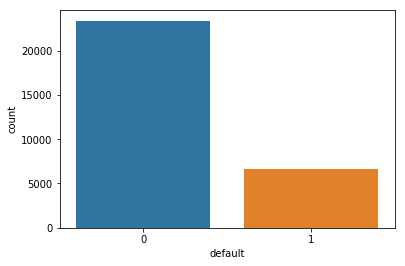

In [6]:
sns.countplot(x = 'default', data= data)

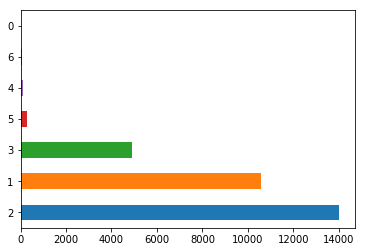

In [21]:
data.EDUCATION.value_counts().plot(kind = "barh")

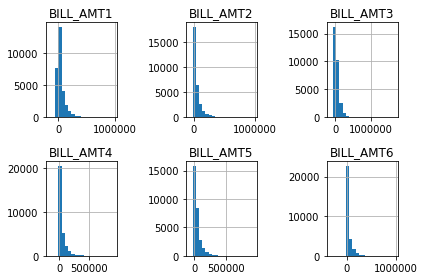

In [15]:
bills = data[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

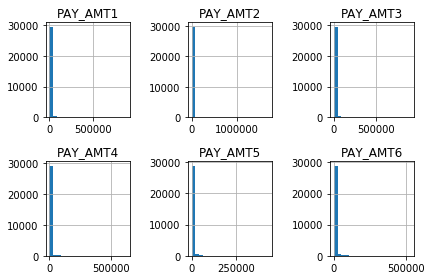

In [16]:
pay = data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)


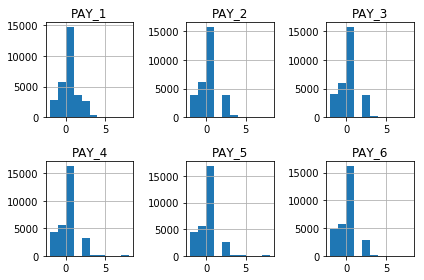

In [17]:
late = data[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

#this is probably more of a category

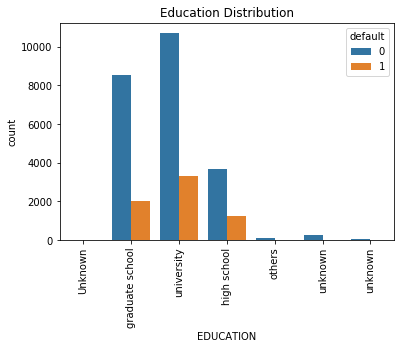

In [5]:
# Education Distribution
plt.title('Education Distribution')
ax2 = sns.countplot(x= 'EDUCATION', hue = 'default', data = data)
ax2.set_xticklabels(['Unknown','graduate school','university','high school','others','unknown','unknown'],rotation = 90)
plt.show()

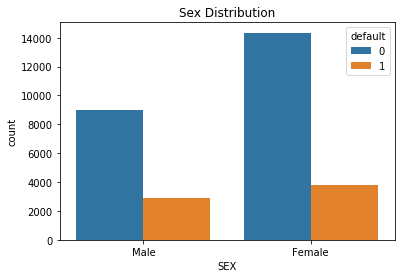

In [6]:
# SEX distribution
plt.title('Sex Distribution')
ax3 = sns.countplot(x= 'SEX', hue = 'default', data = data)
ax3.set_xticklabels(['Male','Female'])
plt.show()

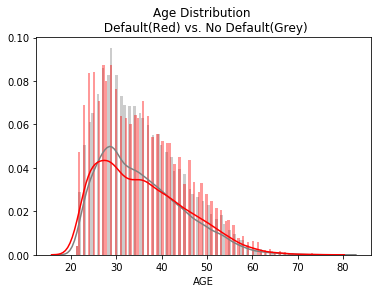

In [7]:
# Age Distribution
plt.title('Age Distribution \n Default(Red) vs. No Default(Grey)')
agedist0 = data[data['default']==0]['AGE']
agedist1 = data[data['default']==1]['AGE']
sns.distplot(agedist0, bins = 100, color = 'grey')
sns.distplot(agedist1, bins = 100, color = 'red')
plt.show()

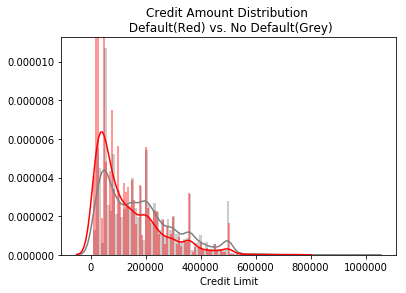

In [8]:
# Credit Amount Distribution
plt.title('Credit Amount Distribution \n Default(Red) vs. No Default(Grey)')
cadist0 = data[data['default']==0]['LIMIT_BAL']
cadist1 = data[data['default']==1]['LIMIT_BAL']
sns.distplot(cadist0, bins = 100, color = 'grey')
sns.distplot(cadist1, bins = 100, color = 'red')
plt.xlabel('Credit Limit')
plt.show()

In [7]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

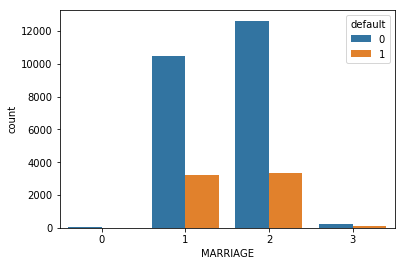

In [8]:
sns.countplot(x = 'MARRIAGE', hue = 'default', data= data)

In [ ]:
sns.distplot(data['AGE'], kde= False, bins=30, rug= True)
plt.figure(figsize=(12,8))
sns.set(figsize=(2, 4)) or sns.set_figsize(2, 4)



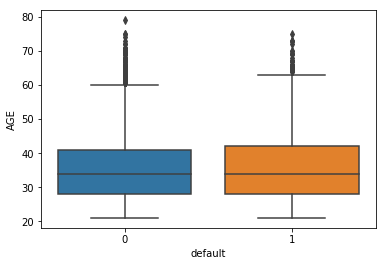

In [8]:
sns.boxplot(x='default', y = 'AGE', data = data)

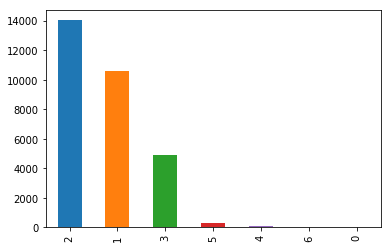

In [36]:
data.EDUCATION.value_counts().plot(kind = "bar")

## Feature Engineering

In [5]:
#Feature 1: Categorise on the basis of age : young, middle, old 

data['age_group'] = pd.cut(data.AGE, [21,40,60,81], labels=["young","middle","senior"])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,age_group
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,young
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,young
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,young
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,young
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,middle


In [6]:
#Feature 2: Categorise Risk on the basis of previous payment defaults.
#lets add a column pay_total. This have total number of payments done or missed. 
data['pay_total'] = (data.PAY_1 + data.PAY_2 + data.PAY_3 + data.PAY_4 + data.PAY_5 + data.PAY_6)
data['total_pay_amount'] = (data.PAY_AMT1 + data.PAY_AMT2 + data.PAY_AMT3 + data.PAY_AMT4 + data.PAY_AMT5
                           + data.PAY_AMT6)
data['total_bill_amt'] = (data.BILL_AMT1 + data.BILL_AMT2 + data.BILL_AMT3 + data.BILL_AMT4 + 
                         data.BILL_AMT5 + data.BILL_AMT6)
data['avg_bill_amt'] = data['total_bill_amt']/6 

### Credit card minimum payment calculation
Credit card minimum payment is the least amount you can pay toward your credit card balance without
being penalized with a late fee and possible interest rate increase. Minimum payment can change from one 
month to the next. Sometimes it's lower. Sometimes it's higher.
Some credit card issuers calculate the minimum payment as a percent of the balance, typically between
2% and 5%. They use the balance at the end of your billing cycle to calculate the minimum payment due.

In [7]:
#we need to calculate minimum payment for each month
#here, i will take minimum balance as a 2.5% of the balance
def min_pay(x) :
    x['min_pay1'] = x['BILL_AMT1'] * 0.025
    x['min_pay2'] = x['BILL_AMT2'] * 0.025
    x['min_pay3'] = x['BILL_AMT3'] * 0.025
    x['min_pay4'] = x['BILL_AMT4'] * 0.025
    x['min_pay5'] = x['BILL_AMT5'] * 0.025
    x['min_pay6'] = x['BILL_AMT6'] * 0.025
    return x

In [8]:
data = data.apply(min_pay, axis = 1)

In [9]:
#finding the average of minimum payment over 6 months
data['avg_min_pay'] = (data.min_pay1 + data.min_pay2 + data.min_pay3 + data.min_pay4 + data.min_pay5
                      + data.min_pay6)/6

In [10]:
data.drop(['min_pay1','min_pay2','min_pay3','min_pay4','min_pay5','min_pay6'], inplace = True, axis = 1)

In [11]:
#finding the payment due for each month, then taking the average
def pay_due(x) :
    x['pay_due1'] = x['BILL_AMT1'] - x['PAY_AMT1']
    x['pay_due2'] = x['BILL_AMT2'] - x['PAY_AMT2'] 
    x['pay_due3'] = x['BILL_AMT3'] - x['PAY_AMT3']
    x['pay_due4'] = x['BILL_AMT4'] - x['PAY_AMT4']
    x['pay_due5'] = x['BILL_AMT5'] - x['PAY_AMT5']
    x['pay_due6'] = x['BILL_AMT6'] - x['PAY_AMT6']
    x['total_pay_due'] = x['total_bill_amt'] - x['total_pay_amount']
    return x

In [12]:
data = data.apply(pay_due, axis = 1)

In [13]:
data.drop(['pay_due1','pay_due2','pay_due3','pay_due4','pay_due5','pay_due6'],axis = 1, inplace=True)

In [14]:
#now find the percent of utilization of credit card limit
data['utilized_credit']= (data['avg_bill_amt']/data['LIMIT_BAL']) *100

In [15]:
def unutilized_credit(x):
    x['un_credit1'] = x['LIMIT_BAL'] - x['BILL_AMT1']
    x['un_credit2'] = x['LIMIT_BAL'] - x['BILL_AMT2']
    x['un_credit3'] = x['LIMIT_BAL'] - x['BILL_AMT3']
    x['un_credit4'] = x['LIMIT_BAL'] - x['BILL_AMT4']
    x['un_credit5'] = x['LIMIT_BAL'] - x['BILL_AMT5']
    x['un_credit6'] = x['LIMIT_BAL'] - x['BILL_AMT6']
    x['avg_un_credit'] = (x['un_credit1'] + x['un_credit2'] + x['un_credit3'] + x['un_credit4'] +
                         x['un_credit5'] + x['un_credit6'])/6
    return x

In [16]:
data = data.apply(unutilized_credit, axis = 1)

In [17]:
data.drop(['un_credit1','un_credit2','un_credit3','un_credit4','un_credit5','un_credit6'],axis=1,
         inplace = True)

In [18]:
#Categorise Risk on the basis of previous payment defaults.
data['risk_cat'] = pd.cut(data.pay_total, [-13,-5,5,37], labels=["low","medium","high"])

In [28]:
#Feature 4: Categories on the basis of usage : high, medium, low. 
data[['pay_total','risk_cat']].head(20)

,pay_total,risk_cat
0,-2,medium
1,3,medium
2,0,medium
3,0,medium
4,-2,medium
5,0,medium
6,0,medium
7,-3,medium
8,2,medium
9,-10,low


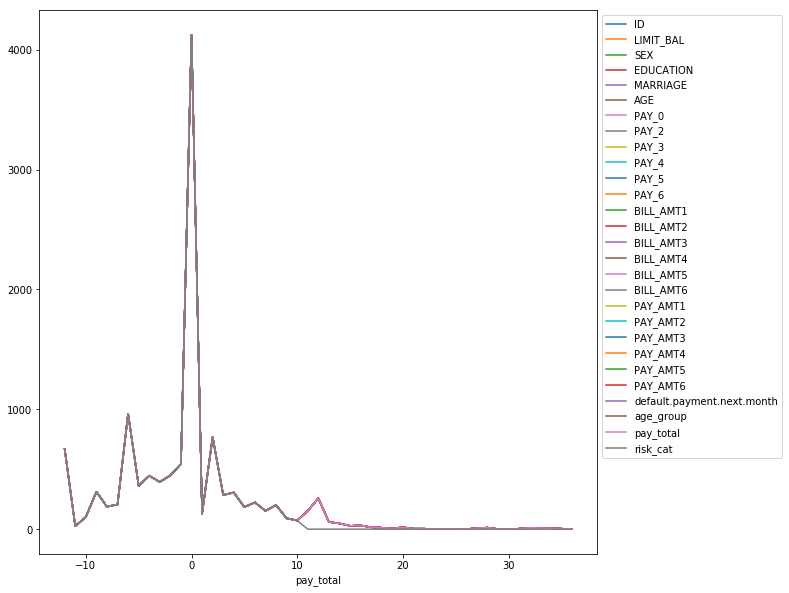

In [15]:
#How many males have defaulted the payment recently
data[data['SEX'] == 1].groupby(data['pay_total']).count().plot(figsize = (10,10))
plt.legend(bbox_to_anchor=(1, 1), loc=2)

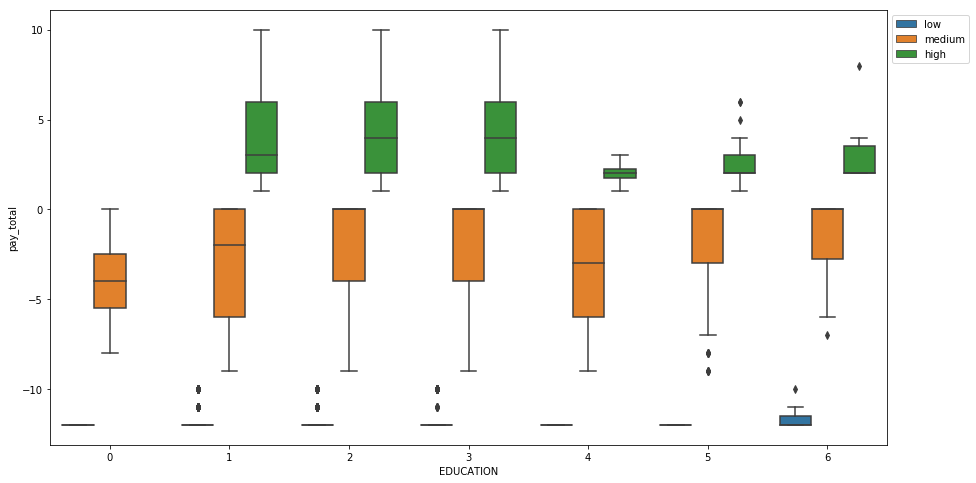

In [16]:
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#Risk category on the basis of their education
plt.figure(figsize=(15,8))
sns.boxplot(x= 'EDUCATION', y = 'pay_total',data=data, hue = 'risk_cat')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [49]:
from pandas import set_option
correlation = data.corr()
set_option('display.width', 100)
set_option('precision', 3)
print (correlation)

                         ID  LIMIT_BAL        SEX  EDUCATION  MARRIAGE    AGE  PAY_1  PAY_2  \
ID                1.000e+00      0.026  1.850e-02  3.918e-02    -0.029  0.019 -0.031 -0.011   
LIMIT_BAL         2.618e-02      1.000  2.476e-02 -2.192e-01    -0.108  0.145 -0.271 -0.296   
SEX               1.850e-02      0.025  1.000e+00  1.423e-02    -0.031 -0.091 -0.058 -0.071   
EDUCATION         3.918e-02     -0.219  1.423e-02  1.000e+00    -0.143  0.175  0.105  0.122   
MARRIAGE         -2.908e-02     -0.108 -3.139e-02 -1.435e-01     1.000 -0.414  0.020  0.024   
AGE               1.868e-02      0.145 -9.087e-02  1.751e-01    -0.414  1.000 -0.039 -0.050   
PAY_1            -3.057e-02     -0.271 -5.764e-02  1.054e-01     0.020 -0.039  1.000  0.672   
PAY_2            -1.121e-02     -0.296 -7.077e-02  1.216e-01     0.024 -0.050  0.672  1.000   
PAY_3            -1.849e-02     -0.286 -6.610e-02  1.140e-01     0.033 -0.053  0.574  0.767   
PAY_4            -2.735e-03     -0.267 -6.017e-02 

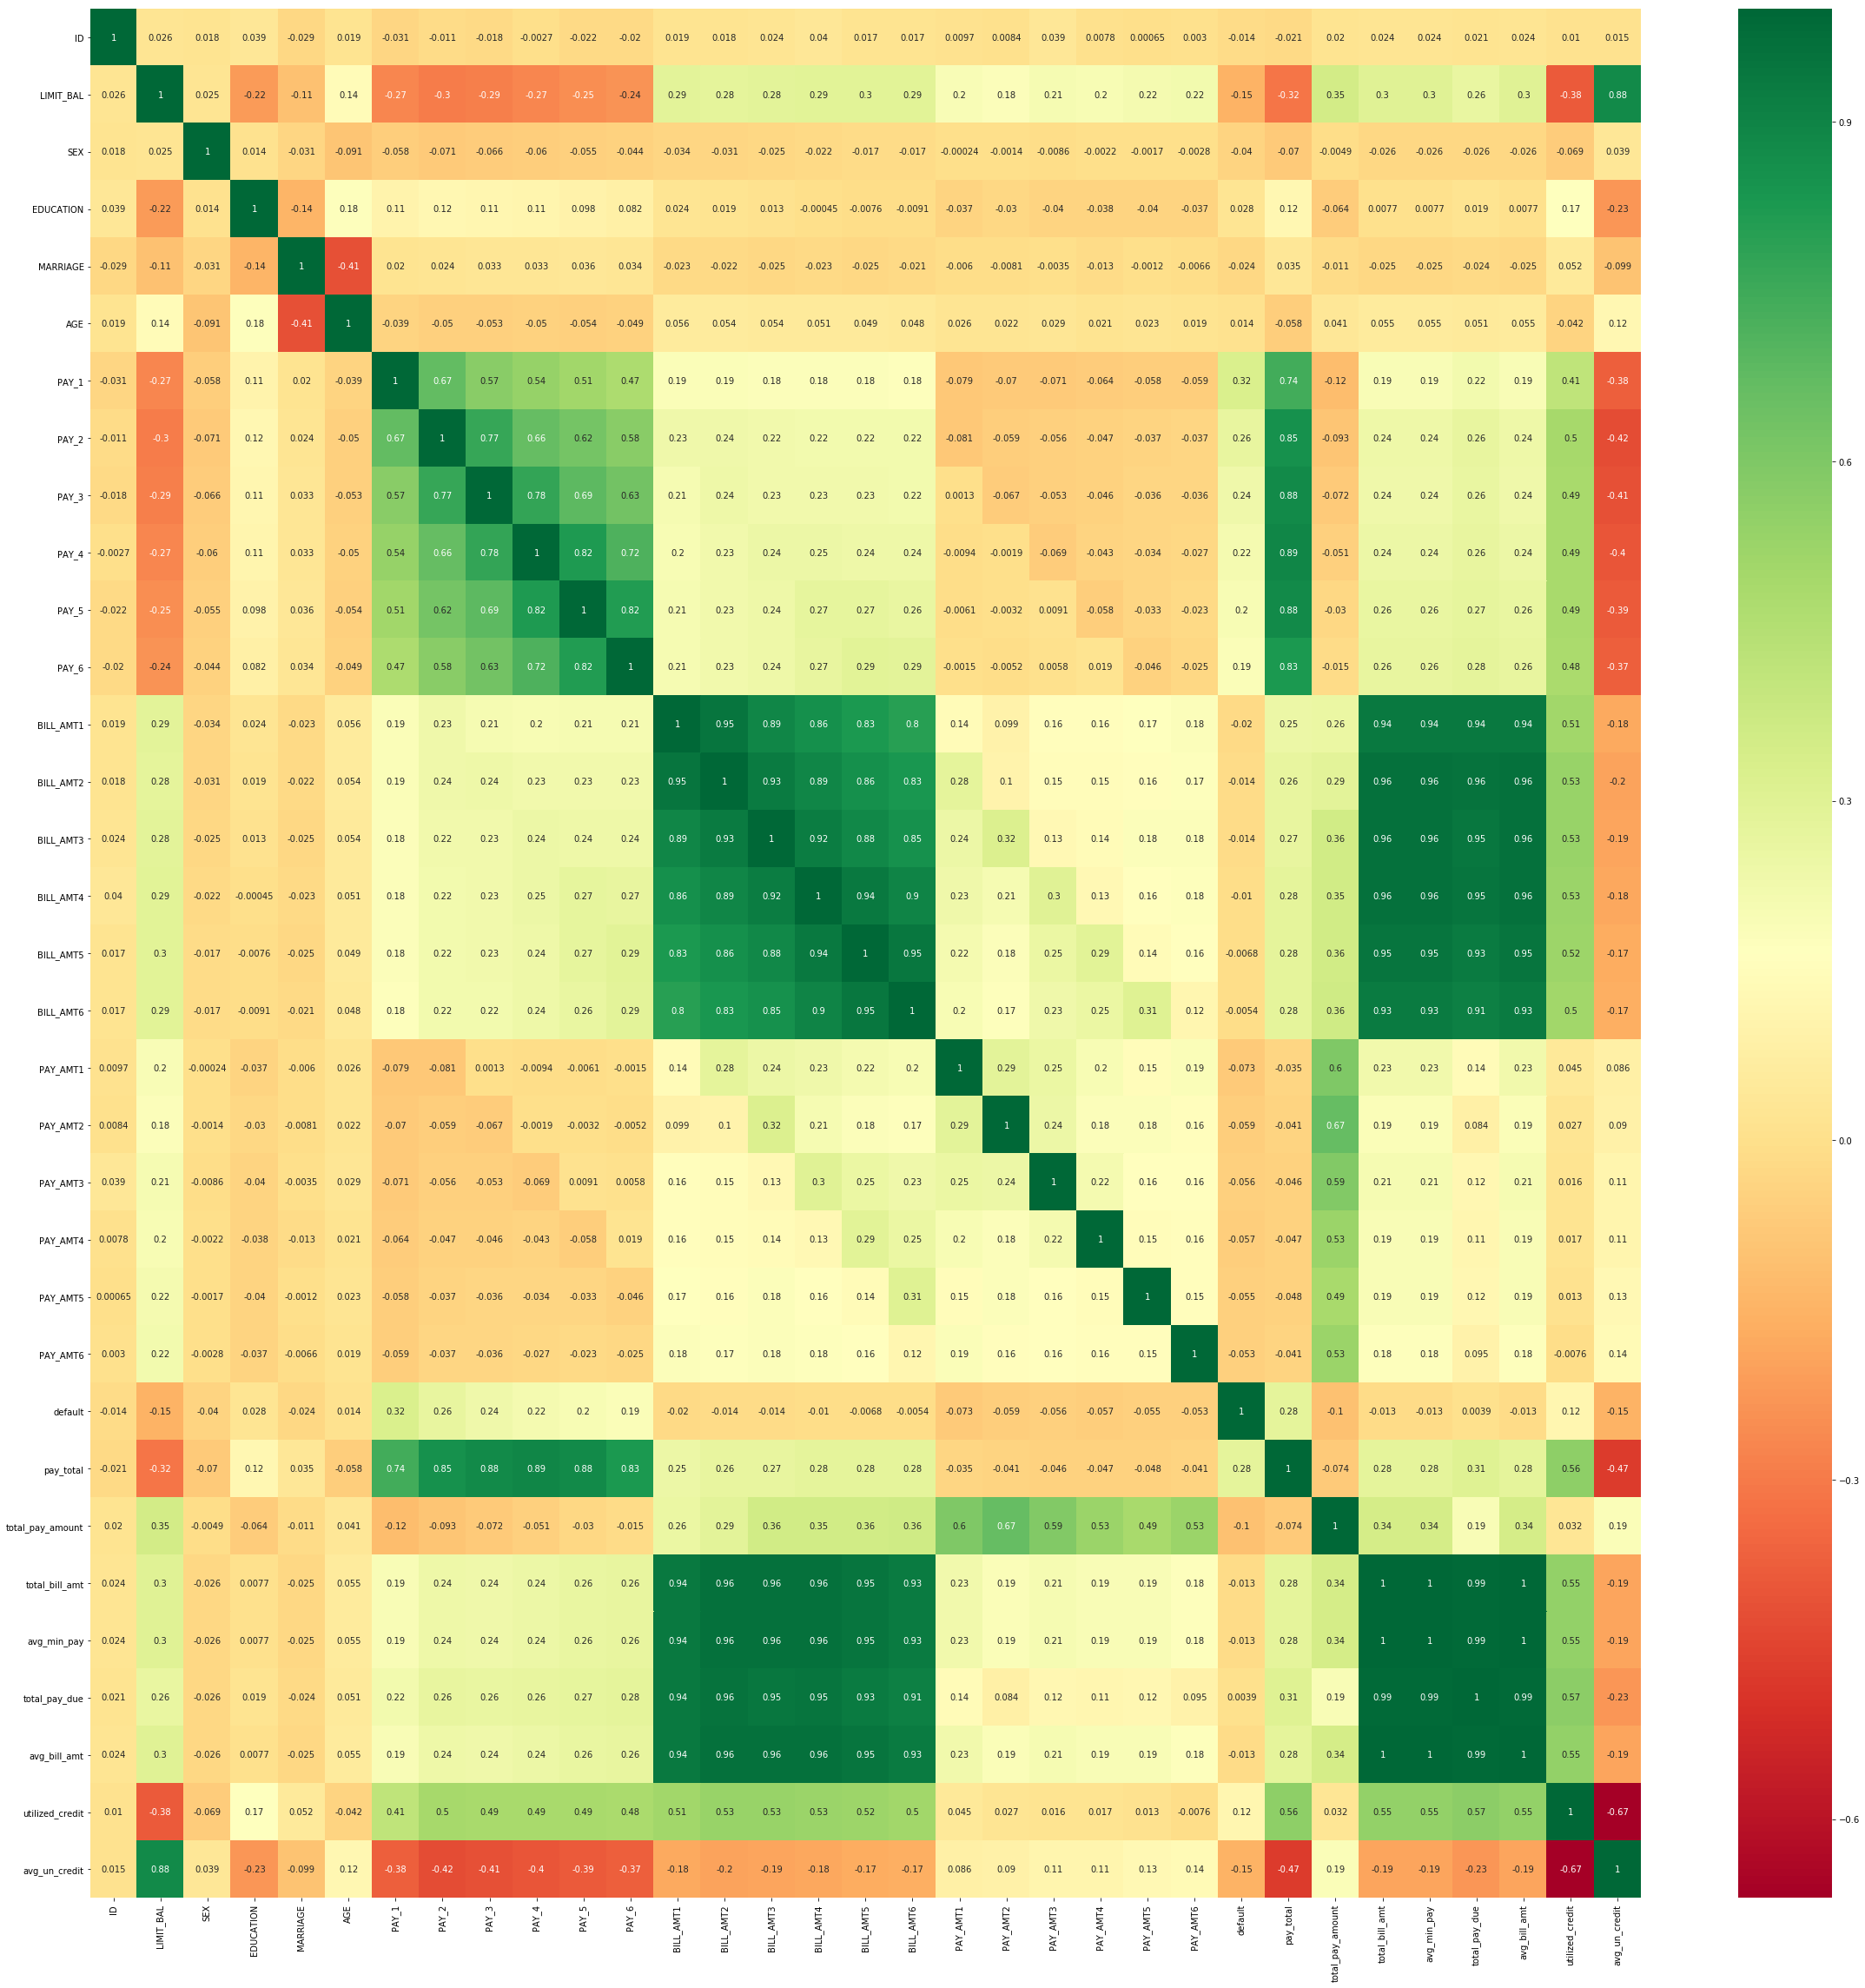

In [50]:
top_corr_features = correlation.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [52]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold :
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [53]:
corr_features = correlation(data, 0.8)
print("correlated features :", len(set(corr_features)))

correlated features : 13


In [54]:
corr_features

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_5',
 'PAY_6',
 'avg_bill_amt',
 'avg_min_pay',
 'avg_un_credit',
 'pay_total',
 'total_bill_amt',
 'total_pay_due'}

0    23364
1     6636
Name: default, dtype: int64


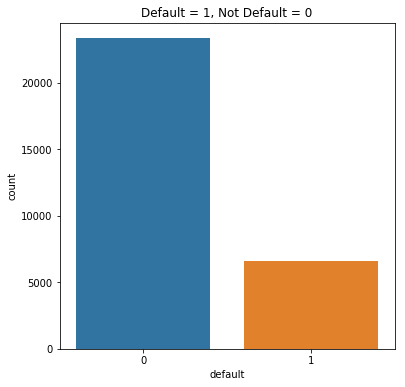

In [66]:
#lets check data unbalance
print(data['default'].value_counts())
plt.figure(figsize = (6,6))
plt.title('Default = 1, Not Default = 0')
sns.countplot(x = 'default', data= data)
plt.show()

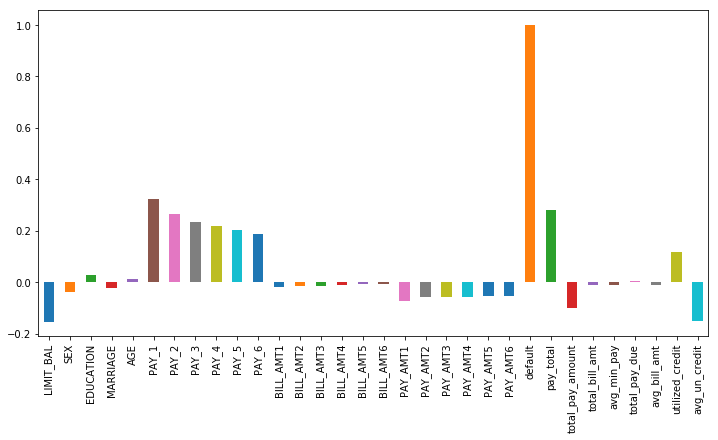

In [65]:
plt.figure(figsize = (12,6))
data[data.columns[1:]].corr()['default'][:].plot(kind = 'Bar')
plt.show()

In [19]:
data.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis =1, inplace = True)

In [192]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default', 'age_group', 'pay_total', 'total_pay_amount', 'total_bill_amt',
       'avg_min_pay', 'total_pay_due', 'avg_bill_amt', 'utilized_credit', 'avg_un_credit',
       'risk_cat'],
      dtype='object')

In [20]:
data.drop(['ID'], axis =1, inplace = True)

Weight of Evidence (WOE)

In [87]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF = pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if data[ivars].dtype.kind in 'bifc':
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = d['Events'] / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = d['Non-Events'] / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], 
                            "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF

In [88]:
IV_Table = iv_woe(data = data, target = 'default', bins=10, show_woe = True)

Information value of LIMIT_BAL is -0.178139
                  Cutoff     N  Events  % of Events  Non-Events  \
0    (9999.999, 30000.0]  4081    1463     0.220464        2618   
1     (30000.0, 50000.0]  3595     977     0.147227        2618   
2     (50000.0, 70000.0]  1556     443     0.066757        1113   
3    (70000.0, 100000.0]  3266     801     0.120705        2465   
4   (100000.0, 140000.0]  2792     638     0.096142        2154   
5   (140000.0, 180000.0]  3331     578     0.087101        2753   
6   (180000.0, 210000.0]  2487     436     0.065702        2051   
7   (210000.0, 270000.0]  2934     478     0.072031        2456   
8   (270000.0, 360000.0]  3482     528     0.079566        2954   
9  (360000.0, 1000000.0]  2476     294     0.044304        2182   

   % of Non-Events       WoE        IV  
0         0.112053 -0.676765 -0.073369  
1         0.112053 -0.273008 -0.009603  
2         0.047637 -0.337442 -0.006452  
3         0.105504 -0.134601 -0.002046  
4         0.0

               Cutoff     N  Events  % of Events  Non-Events  % of Non-Events  \
0     (-0.001, 500.0]  9116    2525     0.380500        6591         0.282101   
1     (500.0, 1000.0]  3594     848     0.127788        2746         0.117531   
2    (1000.0, 1500.0]  2336     548     0.082580        1788         0.076528   
3    (1500.0, 2123.4]  2954     655     0.098704        2299         0.098399   
4    (2123.4, 3200.0]  3018     603     0.090868        2415         0.103364   
5    (3200.0, 5000.0]  3175     571     0.086046        2604         0.111454   
6    (5000.0, 9500.0]  2810     504     0.075949        2306         0.098699   
7  (9500.0, 426529.0]  2997     382     0.057565        2615         0.111924   

        WoE            IV  
0 -0.299223 -2.944343e-02  
1 -0.083667 -8.581378e-04  
2 -0.076109 -4.606042e-04  
3 -0.003093 -9.426343e-07  
4  0.128850 -1.610134e-03  
5  0.258728 -6.573680e-03  
6  0.262006 -5.960512e-03  
7  0.664912 -3.614429e-02  
Information value 

Information value of risk_cat is -0.534847
   Cutoff      N  Events  % of Events  Non-Events  % of Non-Events       WoE  \
0     low   8029    1305     0.196655        6724         0.287793  0.380793   
1  medium  18788    3320     0.500301       15468         0.662044  0.280122   
2    high   3183    2011     0.303044        1172         0.050163 -1.798607   

         IV  
0 -0.034705  
1 -0.045308  
2 -0.454834  


Information Value	Variable Predictiveness
Less than 0.02	Not useful for prediction
0.02 to 0.1	Weak predictive Power
0.1 to 0.3	Medium predictive Power
0.3 to 0.5	Strong predictive Power
>0.5	 Suspicious Predictive Power


In [89]:
df = data.copy()

In [90]:
df['risk_cat_woe'] = df['risk_cat'].replace(['low','medium','high'], [0.347,0.318,-1.761])
df['LIMIT_BAL_WOE'] = pd.cut(df.LIMIT_BAL, bins=[8000,30000,50000,70000,100000,140000,180000,210000,
                270000,360000,1100000],labels=[-0.677,-0.273,-0.337,-0.135,-0.042,0.302,0.290,0.378,0.463
                                              ,0.746])

In [91]:
df['PAY_1_WOE'] = pd.cut(df.PAY_1, bins=[-4.0,-1.0,0,1,2,9], labels=[0.428,0.659,-0.593,-2.065,-2.199])
df['PAY_2_WOE'] = pd.cut(df.PAY_2, bins=[-2.001,-1.0,0.0,2.0,9.0], labels=[0.337,0.406,
                                                                               -1.473,-1.640])
df['PAY_3_WOE'] = pd.cut(df.PAY_3, bins=[-2.001,-1.0,0.0,2.0,9.0], labels=[0.342,0.295,
                                                                               -1.320,-1.643])
df['PAY_4_WOE'] = pd.cut(df.PAY_4, bins=[-2.001,-1.0,0.0,2.0,9.0], labels=[0.302,0.236,
                                                                               -1.352,-1.855])
df['PAY_5_WOE'] = pd.cut(df.PAY_5, bins=[-2.001,-1.0,0.0,9.0], labels=[0.273,0.201,
                                                                               -1.482])
df['PAY_6_WOE'] = pd.cut(df.PAY_6, bins=[-2.001,-1.0,0.0,2.0,9.0], labels=[0.231,0.201,
                                                                               -1.285,-1.971])

In [92]:
df['PAY_AMT1_WOE'] = pd.cut(df.PAY_AMT1, bins=[-0.001,316.0,1263.7,1724.0,2100.0,3000.0,4309.3,6192.2,
             10300.0,873553.0], labels=[-0.605,-0.030,-0.038,0.027,0.012,0.076,0.422,0.525,0.662])
df['PAY_AMT2_WOE'] = pd.cut(df.PAY_AMT2, bins = [-0.001,268.8,1165.0,1600.0,2009.0,3000.0,4045.3,6000.0,
                10401.1,1684260.0], labels=[-0.535,-0.038,-0.175,0.014,0.068,0.091,0.274,0.459,0.819])
df['PAY_AMT3_WOE'] = pd.cut(df.PAY_AMT3, bins=[-0.001,2.8,780.0,1206.0,1800.0,2500.0,3560.3,5284.0,
             10000.0,896041.0], labels=[-0.519,-0.063,-0.015,-0.074,0.032,0.153,0.325,0.374,0.672])
df['PAY_AMT4_WOE']= pd.cut(df.PAY_AMT4, bins=[-0.001,500.0,1000.0,1500.0,2100.0,3200.0,5000.0,9570.6,
            621001.0], labels=[-0.327,-0.115,-0.101,0.030,0.220,0.281,0.350,0.596])
df['PAY_AMT5_WOE'] = pd.cut(df.PAY_AMT5, bins=[-0.001,500.0,1000.0,1500.0,2123.4,3200.0,5000.0,9500.0,
            426530.0], labels=[-0.299,-0.084,-0.076,-0.003,0.129,0.259,0.262,0.665])
df['PAY_AMT6_WOE']= pd.cut(df.PAY_AMT6, bins=[-0.001,426.0,1000.0,1500.0,2100.0,3200.0,5000.0,9600.0,
            528667.0], labels=[-0.305,-0.110,-0.142,0.018,0.141,0.251,0.360,0.684])

In [93]:
df['PAY_TOTAL_WOE'] = pd.cut(df.pay_total, bins =[-12.001,-9.0,-6.0,-4.0,-1.0,0.0,2.0,6.0,37.0],labels=[
                    0.238,0.506,0.433,0.435,0.823,-0.576,-1.074,-1.845])
df['TOTAL_PAY_AMOUNT_WOE'] = pd.cut(df.total_pay_amount, bins=[-0.001,2424.4,5480.8,7840.0,10530.0,
                    14383.0,20046.8,28186.6,40864.4,71749.6,3764067.0], labels=[-0.538,-0.437,-0.372,-0.219,
                    -0.315,0.159,0.264,0.356,0.518,0.980])
df['UTILIZED_CREDIT_WOE']= pd.cut(df.utilized_credit, bins=[-23.26,0.417,1.752,5.1,13.392,28.483,45.176,
                    61.401,75.821,89.035,536.432], labels=[-0.213,0.168,0.529,0.540,0.409,0.163,
                    -0.104,-0.192,-0.407,-0.529])
df['AVG_UN_CREDIT_WOE'] = pd.cut(df.avg_un_credit, bins=[-235502.66799999998,4858.85,15024.867,26627.4,45071.967,
                    76077.75,120409.033,171620.583,223368.2,313155.333,795667.667], labels=[-0.625,-0.546,
                    -0.373,-0.075,-0.054,0.172,0.417,0.422,0.554,0.631])

In [94]:
df.isnull().any()

LIMIT_BAL               False
SEX                     False
EDUCATION               False
MARRIAGE                False
AGE                     False
PAY_1                   False
PAY_2                   False
PAY_3                   False
PAY_4                   False
PAY_5                   False
PAY_6                   False
PAY_AMT1                False
PAY_AMT2                False
PAY_AMT3                False
PAY_AMT4                False
PAY_AMT5                False
PAY_AMT6                False
default                 False
age_group                True
pay_total               False
total_pay_amount        False
total_bill_amt          False
avg_bill_amt            False
avg_min_pay             False
total_pay_due           False
utilized_credit         False
avg_un_credit           False
risk_cat                False
risk_cat_woe            False
LIMIT_BAL_WOE           False
PAY_1_WOE               False
PAY_2_WOE               False
PAY_3_WOE               False
PAY_4_WOE 

In [95]:
df.drop(['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_2','PAY_3','PAY_4','PAY_5',
        'PAY_6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','age_group','pay_total',
        'total_pay_amount','total_bill_amt','avg_min_pay','total_pay_due','avg_bill_amt','utilized_credit',
        'risk_cat','avg_un_credit'], axis =1, inplace = True)

In [96]:
df.shape

(30000, 19)

In [97]:
# Splitting the train_data into the Training set and Test set
X = df.loc[:, df.columns != 'default']
Y = df.loc[:, ['default']]
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [99]:
lr= LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
pred1 = lr.predict(X_test)
print('Test Set')
print('extraTrees roc-auc')
accuracy_score(Y_test, pred1)

Test Set
extraTrees roc-auc


0.8242666666666667

In [100]:
lr.intercept_

array([-1.25068248])

In [101]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,risk_cat_woe,0.069336
1,LIMIT_BAL_WOE,0.188739
2,PAY_1_WOE,-0.654508
3,PAY_2_WOE,0.042808
4,PAY_3_WOE,-0.132472
5,PAY_4_WOE,-0.018892
6,PAY_5_WOE,-0.155118
7,PAY_6_WOE,-0.174120
8,PAY_AMT1_WOE,-0.196008
9,PAY_AMT2_WOE,-0.158527


In [102]:
prob = lr.predict_proba(X_test)[:,1]
prob

array([0.67006152, 0.29553127, 0.25058476, ..., 0.13359633, 0.49239925,
       0.10006032])

In [145]:
    list1 = []
    list1.append(int(input('LIMIT_BAL :')))
    list1.append(int(input('Enter Sex; 1=male, 2=female :')))
    list1.append(int(input('EDUCATION; 1=graduate school, 2=university, 3=high school, 4=others, :')))
    list1.append(int(input('MARRIAGE; 1=married, 2=single, 3=others  :')))  
    list1.append(int(input('AGE :')))
    list1.append(int(input('Repayment status PAY_1 :')))
    list1.append(int(input('PAY_2 :')))
    list1.append(int(input('PAY_3 :')))
    list1.append(int(input('PAY_4 :')))                      
    list1.append(int(input('PAY_5 :')))
    list1.append(int(input('PAY_6 :')))
    list1.append(int(input('BILL_AMT1 ;BILL_AMT should be less than LIMIT_BAL  :')))
    list1.append(int(input('BILL_AMT2 :')))
    list1.append(int(input('BILL_AMT3 :')))
    list1.append(int(input('BILL_AMT4 :')))
    list1.append(int(input('BILL_AMT5 :')))
    list1.append(int(input('BILL_AMT6 :')))
    list1.append(int(input('PAY_AMT1 :')))
    list1.append(int(input('PAY_AMT2 :')))
    list1.append(int(input('PAY_AMT3 :')))
    list1.append(int(input('PAY_AMT4 :')))
    list1.append(int(input('PAY_AMT5 :'))) 
    list1.append(int(input('PAY_AMT6 :')))  

LIMIT_BAL :50000
Enter Sex; 1=male, 2=female :2
EDUCATION; 1=graduate school, 2=university, 3=high school, 4=others, :1
MARRIAGE; 1=married, 2=single, 3=others  :3
AGE :57
Repayment status PAY_1 :0
PAY_2 :1
PAY_3 :2
PAY_4 :0
PAY_5 :1
PAY_6 :3
BILL_AMT1 ;BILL_AMT should be less than LIMIT_BAL  :45000
BILL_AMT2 :20000
BILL_AMT3 :30000
BILL_AMT4 :45000
BILL_AMT5 :20000
BILL_AMT6 :34000
PAY_AMT1 :10000
PAY_AMT2 :15000
PAY_AMT3 :25000
PAY_AMT4 :40000
PAY_AMT5 :20000
PAY_AMT6 :30000


In [146]:
test = pd.DataFrame([list1], columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [147]:
test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,2,1,3,57,0,1,2,0,1,...,30000,45000,20000,34000,10000,15000,25000,40000,20000,30000


In [148]:
test['age_group'] = pd.cut(test.AGE, [21,40,60,81], labels=["young","middle","senior"])
test['pay_total'] = (test.PAY_1 + test.PAY_2 + test.PAY_3 + test.PAY_4 + test.PAY_5 + test.PAY_6)
test['total_pay_amount'] = (test.PAY_AMT1 + test.PAY_AMT2 + test.PAY_AMT3 + test.PAY_AMT4 + test.PAY_AMT5
                           + test.PAY_AMT6)
test['total_bill_amt'] = (test.BILL_AMT1 + test.BILL_AMT2 + test.BILL_AMT3 + test.BILL_AMT4 + 
                         test.BILL_AMT5 + test.BILL_AMT6)
test['avg_bill_amt'] = test['total_bill_amt']/6
test['utilized_credit']= (test['avg_bill_amt']/test['LIMIT_BAL']) *100
test['un_credit1'] = test['LIMIT_BAL'] - test['BILL_AMT1']
test['un_credit2'] = test['LIMIT_BAL'] - test['BILL_AMT2']
test['un_credit3'] = test['LIMIT_BAL'] - test['BILL_AMT3']
test['un_credit4'] = test['LIMIT_BAL'] - test['BILL_AMT4']
test['un_credit5'] = test['LIMIT_BAL'] - test['BILL_AMT5']
test['un_credit6'] = test['LIMIT_BAL'] - test['BILL_AMT6']
test['avg_un_credit'] = (test['un_credit1'] + test['un_credit2'] + test['un_credit3'] + 
                         test['un_credit4'] + test['un_credit5'] + test['un_credit6'])/6
test['risk_cat'] = pd.cut(test.pay_total, [-13,-5,5,37], labels=["low","medium","high"])


In [149]:
test['risk_cat_woe'] = pd.cut(test.pay_total, bins=[-13,-5,5,37],labels= [0.347,0.318,-1.761])
test['LIMIT_BAL_WOE'] = pd.cut(test.LIMIT_BAL, bins=[8000,30000,50000,70000,100000,140000,180000,210000,
                270000,360000,1100000],labels=[-0.677,-0.273,-0.337,-0.135,-0.042,0.302,0.290,0.378,0.463
                                              ,0.746])
test['PAY_1_WOE'] = pd.cut(test.PAY_1, bins=[-4.0,-1.0,0,1,2,9], labels=[0.428,0.659,-0.593,-2.065,-2.199])
test['PAY_2_WOE'] = pd.cut(test.PAY_2, bins=[-4.001,-1.0,0.0,2.0,9.0], labels=[0.337,0.406,
                                                                               -1.473,-1.640])
test['PAY_3_WOE'] = pd.cut(test.PAY_3, bins=[-2.001,-1.0,0.0,2.0,9.0], labels=[0.342,0.295,
                                                                               -1.320,-1.643])
test['PAY_4_WOE'] = pd.cut(test.PAY_4, bins=[-2.001,-1.0,0.0,2.0,9.0], labels=[0.302,0.236,
                                                                               -1.352,-1.855])
test['PAY_5_WOE'] = pd.cut(test.PAY_5, bins=[-2.001,-1.0,0.0,9.0], labels=[0.273,0.201,
                                                                               -1.482])
test['PAY_6_WOE'] = pd.cut(test.PAY_6, bins=[-2.001,-1.0,0.0,2.0,9.0], labels=[0.231,0.201,
                                                                               -1.285,-1.971])
test['PAY_AMT1_WOE'] = pd.cut(test.PAY_AMT1, bins=[-0.001,316.0,1263.7,1724.0,2100.0,3000.0,4309.3,6192.2,
             10300.0,873553.0], labels=[-0.605,-0.030,-0.038,0.027,0.012,0.076,0.422,0.525,0.662])
test['PAY_AMT2_WOE'] = pd.cut(test.PAY_AMT2, bins = [-0.001,268.8,1165.0,1600.0,2009.0,3000.0,4045.3,6000.0,
                10401.1,1684260.0], labels=[-0.535,-0.038,-0.175,0.014,0.068,0.091,0.274,0.459,0.819])
test['PAY_AMT3_WOE'] = pd.cut(test.PAY_AMT3, bins=[-0.001,2.8,780.0,1206.0,1800.0,2500.0,3560.3,5284.0,
             10000.0,896041.0], labels=[-0.519,-0.063,-0.015,-0.074,0.032,0.153,0.325,0.374,0.672])
test['PAY_AMT4_WOE']= pd.cut(test.PAY_AMT4, bins=[-0.001,500.0,1000.0,1500.0,2100.0,3200.0,5000.0,9570.6,
            621001.0], labels=[-0.327,-0.115,-0.101,0.030,0.220,0.281,0.350,0.596])
test['PAY_AMT5_WOE'] = pd.cut(test.PAY_AMT5, bins=[-0.001,500.0,1000.0,1500.0,2123.4,3200.0,5000.0,9500.0,
            426530.0], labels=[-0.299,-0.084,-0.076,-0.003,0.129,0.259,0.262,0.665])
test['PAY_AMT6_WOE']= pd.cut(test.PAY_AMT6, bins=[-0.001,426.0,1000.0,1500.0,2100.0,3200.0,5000.0,9600.0,
            528667.0], labels=[-0.305,-0.110,-0.142,0.018,0.141,0.251,0.360,0.684])
test['PAY_TOTAL_WOE'] = pd.cut(test.pay_total, bins =[-12.001,-9.0,-6.0,-4.0,-1.0,0.0,2.0,6.0,37.0],labels=[
                    0.238,0.506,0.433,0.435,0.823,-0.576,-1.074,-1.845])
test['TOTAL_PAY_AMOUNT_WOE'] = pd.cut(test.total_pay_amount, bins=[-0.001,2424.4,5480.8,7840.0,10530.0,
                    14383.0,20046.8,28186.6,40864.4,71749.6,3764067.0], labels=[-0.538,-0.437,-0.372,-0.219,
                    -0.315,0.159,0.264,0.356,0.518,0.980])
test['UTILIZED_CREDIT_WOE']= pd.cut(test.utilized_credit, bins=[-23.26,0.417,1.752,5.1,13.392,28.483,45.176,
                    61.401,75.821,89.035,536.432], labels=[-0.213,0.168,0.529,0.540,0.409,0.163,
                    -0.104,-0.192,-0.407,-0.529])
test['AVG_UN_CREDIT_WOE'] = pd.cut(test.avg_un_credit, bins=[-235502.66799999998,4858.85,15024.867,26627.4,45071.967,
                    76077.75,120409.033,171620.583,223368.2,313155.333,795667.667], labels=[-0.625,-0.546,
                    -0.373,-0.075,-0.054,0.172,0.417,0.422,0.554,0.631])

In [150]:
test.drop(['un_credit1','un_credit2','un_credit3','un_credit4','un_credit5','un_credit6','BILL_AMT1',
           'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','LIMIT_BAL','SEX','EDUCATION',
           'MARRIAGE','AGE','PAY_1','PAY_2','PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6','PAY_AMT1',
           'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','age_group','pay_total',
        'total_pay_amount','total_bill_amt','avg_bill_amt','utilized_credit','risk_cat',
           'avg_un_credit'],axis=1, inplace = True)

In [151]:
#making prediction for test data
prediction = lr.predict(test)
print(prediction)

[0]


In [152]:
proba = lr.predict_proba(test)
print(proba)

[[0.78131096 0.21868904]]


## Evaluating Scorecard

1Model Fitting and Scorecard Point Calculation
After the feature selection, I replace the attributes with the corresponding WoE. Until now, I get the proper data set for the model training. The model used for developing scorecard is logistic regression, which is a popular model for binary classification. I apply cross validation and grid search to tune the parameters. Then, I use the test data set to check the prediction accuracy of the model. Since the Kaggle won’t give the values for target variable, I have to submit my result online to obtain the accuracy. To show the effect of data processing, I train the model with raw data and the processed data. Based on the result given by the Kaggle, the accuracy is improved from 0.693956 to 0.800946 after the data processing.

The final step is calculating the scorecard point for each attribute and produce the final scorecard. The score for each attribute can be calculated with the formula:

Score = (β×WoE+ α/n)×Factor + Offset/n

Where:
β — logistic regression coefficient for characteristics that contains the given attribute
α — logistic regression intercept 
WoE — Weight of Evidence value for the given attribute
n — number of characteristics included in the model
Factor, Offset — scaling parameter

The first four parameters have already been calculated is the previous part. The following formulas are used for calculating factor and offset.

Factor = pdo/Ln(2)
Offset = Score — (Factor × ln(Odds))

coefficient of each attribute of the model
risk_cat_woe	-0.069336
1	LIMIT_BAL_WOE	-0.188739
2	PAY_1_WOE	0.654508
3	PAY_2_WOE	-0.042808
4	PAY_3_WOE	0.132472
5	PAY_4_WOE	0.018892
6	PAY_5_WOE	0.155118
7	PAY_6_WOE	0.174120
8	PAY_AMT1_WOE	0.196008
9	PAY_AMT2_WOE	0.158527
10	PAY_AMT3_WOE	0.193033
11	PAY_AMT4_WOE	0.091270
12	PAY_AMT5_WOE	0.041787
13	PAY_AMT6_WOE	0.119497
14	PAY_TOTAL_WOE	0.271230
15	TOTAL_PAY_AMOUNT_WOE	0.285302
16	UTILIZED_CREDIT_WOE	0.127129
17	AVG_UN_CREDIT_WOE	0.490696

Intercept Value(beta) = -1.25068248
Factor = 20/Ln(2) = 28.85
Offset = 620- 28.85 × Ln (60) = 487.14

In [153]:
test1 = test.copy()

In [154]:
lr.intercept_

array([-1.25068248])

In [155]:
Factor = 28.85
Offsetz = 487.14
test1['pay_1_score'] = (test1['PAY_1_WOE'].astype(float)*-0.654 + (-0.11))* Factor + 44.28
test1['pay_2_score'] = (test1['PAY_2_WOE'].astype(float)*0.042 + (-0.11))* Factor + 44.28
test1['pay_3_score'] = (test1['PAY_3_WOE'].astype(float)*-0.132 + (-0.11))* Factor + 44.28
test1['pay_4_score'] = (test1['PAY_4_WOE'].astype(float)*-0.018 + (-0.11))* Factor + 44.28
test1['pay_5_score'] = (test1['PAY_5_WOE'].astype(float)*-0.155 + (-0.11))* Factor + 44.28
test1['pay_6_score'] = (test1['PAY_6_WOE'].astype(float)*-0.174 + (-0.11))* Factor + 44.28
test1['pay_total_score'] = (test1['PAY_TOTAL_WOE'].astype(float)*-0.271 + (-0.11))* Factor + 44.28
test1['total_pay_amount_score'] = (test1['TOTAL_PAY_AMOUNT_WOE'].astype(float)*-0.285 + (-0.11))* Factor + 44.28
test1['utilized_credit_score'] = (test1['UTILIZED_CREDIT_WOE'].astype(float)*-0.127 + (-0.11))* Factor + 44.28
test1['avg_un_credit_score'] = (test1['AVG_UN_CREDIT_WOE'].astype(float)*-0.490 + (-0.11))* Factor + 44.28
test1['risk_cat_score'] = (test1['risk_cat_woe'].astype(float)*0.069 + (-0.11))* Factor + 44.28

test1['total'] = (test1['risk_cat_score'] + test1['pay_1_score'] +
test1['pay_2_score'] + test1['pay_3_score'] + test1['pay_4_score'] + test1['pay_5_score'] +
test1['pay_6_score'] + test1['pay_total_score'] +
test1['total_pay_amount_score'] + test1['utilized_credit_score'] + test1['avg_un_credit_score'])

0    468.216254
Name: total, dtype: float64


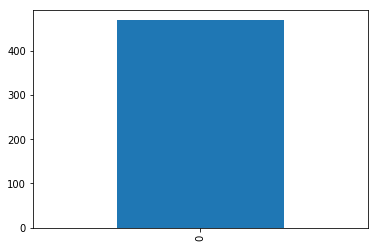

In [156]:
print(test1['total'])
test1['total'].plot(kind='bar')